In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import xgboost
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
df = pd.read_csv('insurance.csv')
df['has_children'] = (df['children'] != 0)
df.head()

,age,sex,bmi,children,smoker,region,charges,has_children
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [3]:
pd.DataFrame(df.groupby('age')['charges'].mean()).head()
pd.DataFrame(df.groupby('age')['charges'].std()).head()

,charges
age,
18,10198.459989
19,12469.537468
20,12049.624794
21,6168.059334
22,14653.363670


In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,has_children,cat_age
0,19,female,27.900,0,yes,southwest,16884.92400,False,0
1,18,male,33.770,1,no,southeast,1725.55230,True,0
2,28,male,33.000,3,no,southeast,4449.46200,True,1
3,33,male,22.705,0,no,northwest,21984.47061,False,1
4,32,male,28.880,0,no,northwest,3866.85520,False,1


In [5]:
df.loc[df['bmi'] < 17, 'bmi'] = 0
df.loc[(df['bmi'] >= 17.0) & (df['bmi'] <= 18.49) , 'bmi'] = 1
df.loc[(df['bmi'] >= 18.5) & (df['bmi'] <= 24.99) , 'bmi'] = 2
df.loc[(df['bmi'] >= 25.0) & (df['bmi'] <= 29.99) , 'bmi'] = 3
df.loc[(df['bmi'] >= 30.0) & (df['bmi'] <= 34.99) , 'bmi'] = 4
df.loc[(df['bmi'] >= 35.0) & (df['bmi'] <= 39.995) , 'bmi'] = 5
df.loc[df['bmi'] >= 40, 'bmi'] = 6
# Abaixo de 17 	Muito abaixo do peso
# Entre 17 e 18,49 	Abaixo do peso
# Entre 18,5 e 24,99 	Peso normal
# Entre 25 e 29,99 	Acima do peso
# Entre 30 e 34,99 	Obesidade I
# Entre 35 e 39,99 	Obesidade II (severa)
# Acima de 40 	Obesidade III (mórbida)

In [21]:
df['cat_age'] = pd.cut(df['age'], bins=[0, 21, 34, 42, 58, 200], labels=[0, 1, 2, 3, 4])

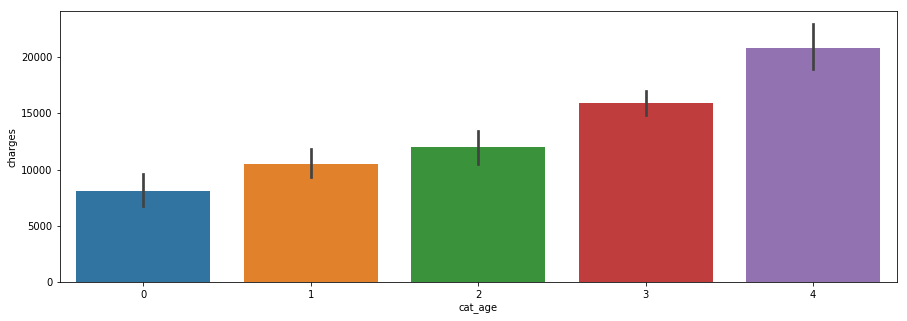

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['cat_age'], y=df['charges']);

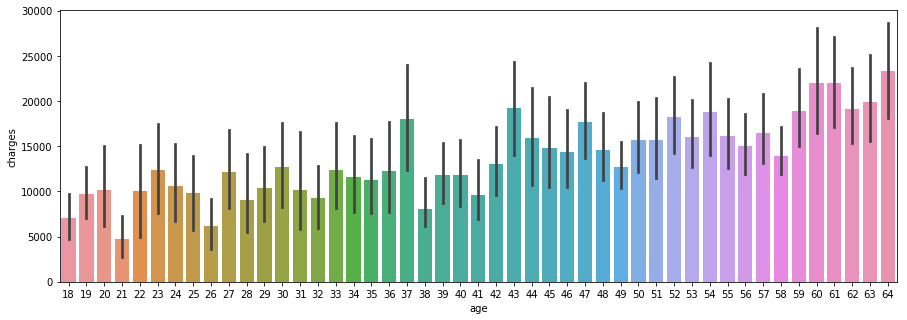

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['age'], y=df['charges']);

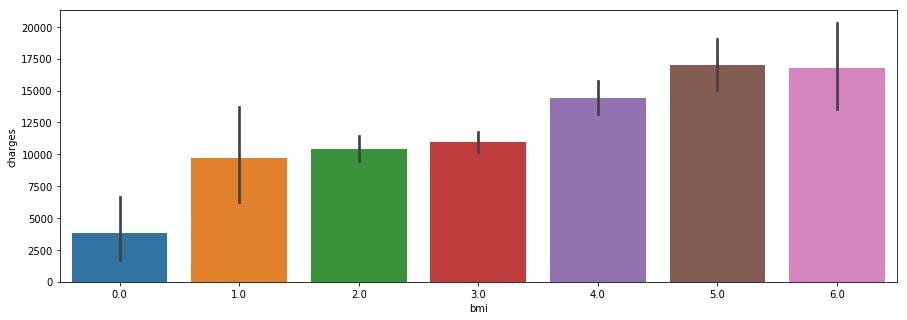

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['bmi'], y=df['charges']);

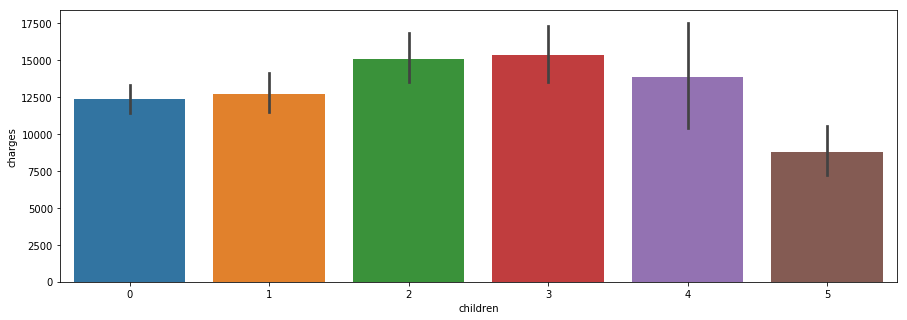

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['children'], y=df['charges']);

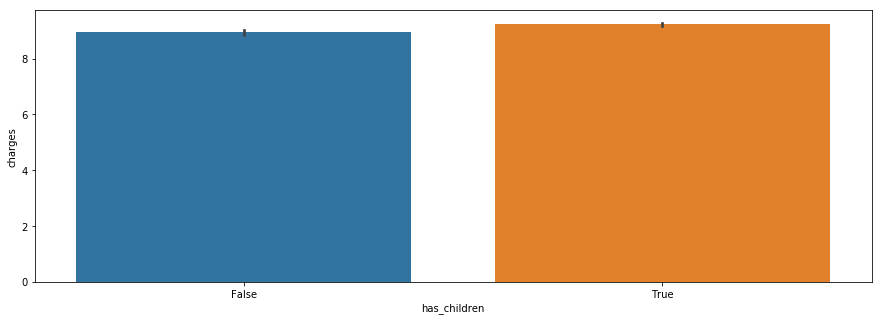

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['has_children'], y=df['charges']);

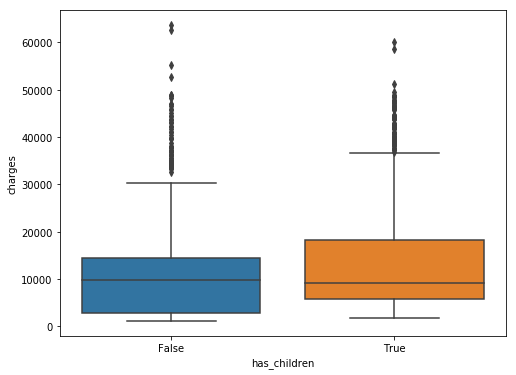

In [15]:
#box plot overallqual/saleprice
var = 'has_children'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

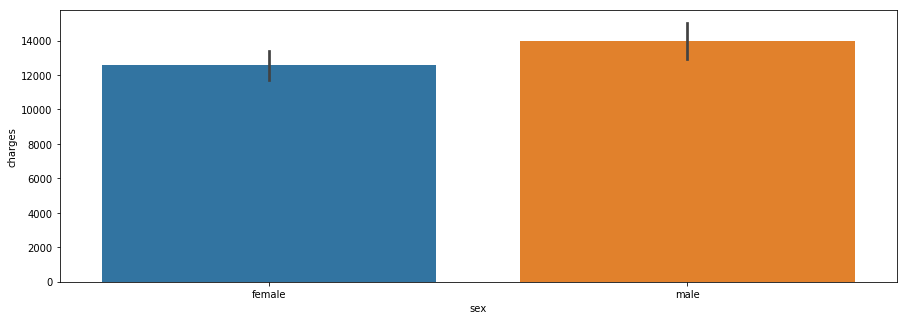

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['sex'], y=df['charges']);

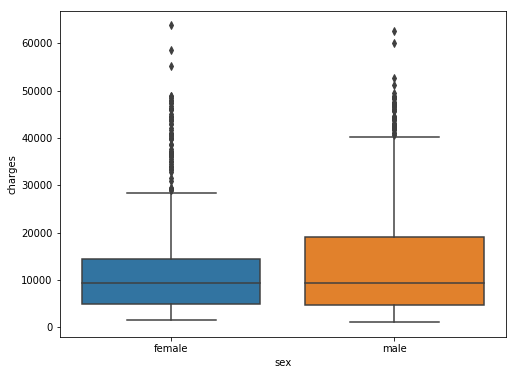

In [11]:
#box plot overallqual/saleprice
var = 'sex'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

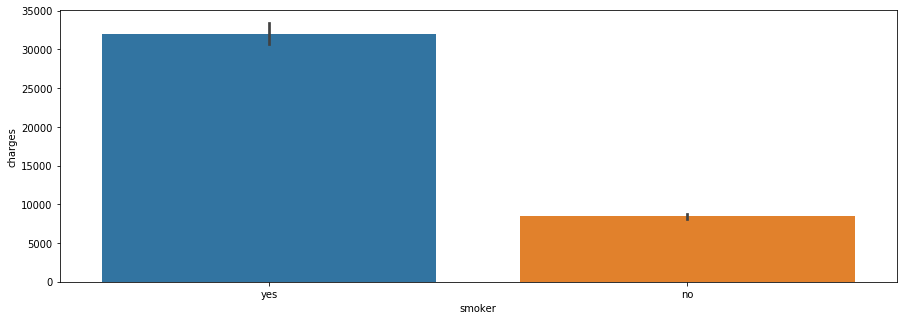

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['smoker'], y=df['charges']);

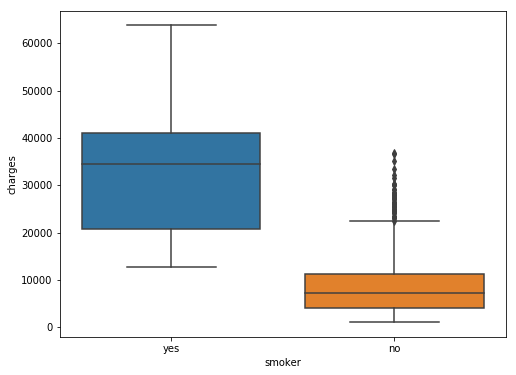

In [36]:
#box plot overallqual/saleprice
var = 'smoker'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

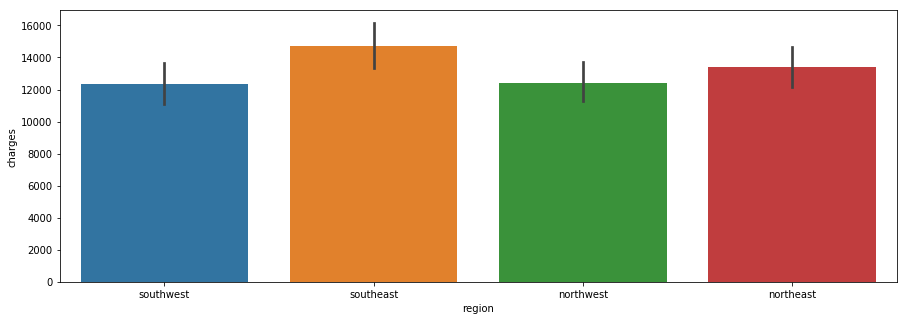

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['region'], y=df['charges']);

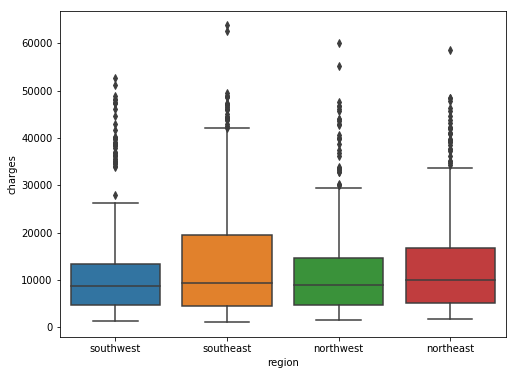

In [37]:
#box plot overallqual/saleprice
var = 'region'
data = pd.concat([df['charges'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=data)

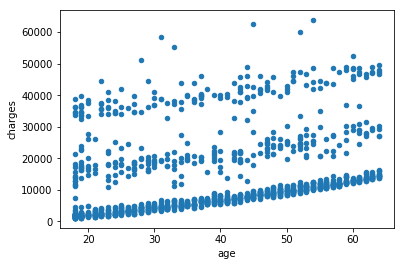

In [35]:
#scatter plot grlivarea/saleprice
var = 'age'
data = pd.concat([df['charges'], df[var]], axis=1)
data.plot.scatter(x=var, y='charges');

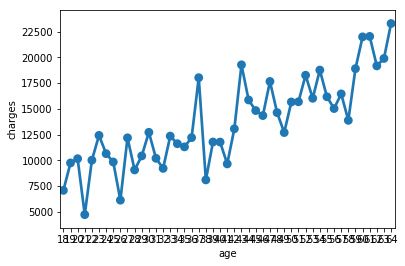

In [20]:
#scatter plot grlivarea/saleprice
var = 'charges'
data = pd.DataFrame(df.groupby('age')['charges'].mean()).reset_index()
#data.plot.scatter(x='age', y='charges')

sns.pointplot(x='age', y='charges',
                      data=data)

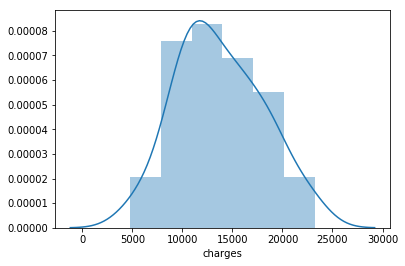

In [24]:
sns.distplot(data['charges']);

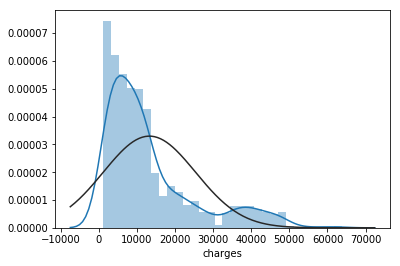

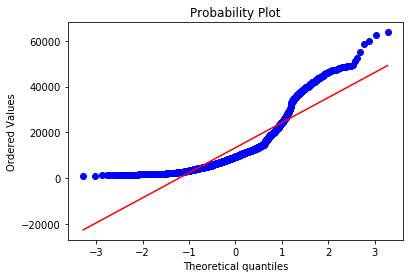

In [21]:
#histogram and normal probability plot
sns.distplot(df['charges'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['charges'], plot=plt)

In [100]:
charges_scaled = StandardScaler().fit_transform(df['charges'][:,np.newaxis]);
low_range = charges_scaled[charges_scaled[:,0].argsort()][:10]
high_range= charges_scaled[charges_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.00355735]
 [-1.00276162]
 [-1.00239533]
 [-1.00235743]
 [-1.00230691]
 [-1.00226902]
 [-1.00194062]
 [-1.00149855]
 [-1.00128383]
 [-1.00012181]]

outer range (high) of the distribution:
[[2.94203111]
 [2.94906197]
 [2.99923879]
 [3.13280608]
 [3.24814803]
 [3.45834801]
 [3.74215922]
 [3.86196644]
 [4.07438867]
 [4.17166316]]


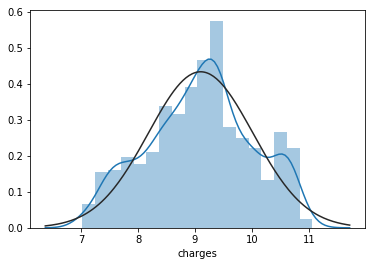

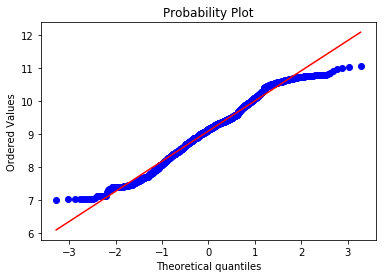

In [38]:
df['charges'] = np.log(df['charges'])
#histogram and normal probability plot
sns.distplot(df['charges'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['charges'], plot=plt)

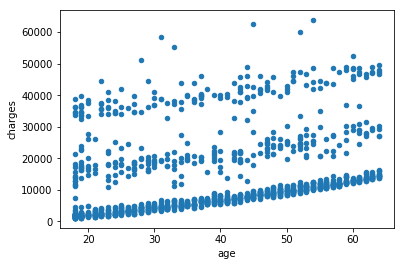

In [9]:
#scatter plot grlivarea/saleprice
var = 'age'
data = pd.concat([df['charges'], df[var]], axis=1)
data.plot.scatter(x=var, y='charges');

In [41]:
df.head()
X = df.drop(columns=['cat_age', 'has_children', 'charges'])
X = pd.get_dummies(X)
quad = PolynomialFeatures (degree = 2)
X = quad.fit_transform(X)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [42]:
reg = LinearRegression().fit(X_train, y_train)
print("Score treino", reg.score(X_train, y_train))
print("Score test", reg.score(X_test, y_test))

Score treino 0.8324312986591604
Score test 0.8611495376154463


In [49]:
df.head()
X = df.drop(columns=['cat_age', 'has_children', 'charges'])
X = pd.get_dummies(X)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [50]:
gbm = xgboost.XGBRegressor()

parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1,0.3],
   'min_child_weight':[1.5,6,10],
   'learning_rate':[0.1,0.07],
   'max_depth':[3,5],
   'n_estimators':[10000],
   'reg_alpha':[1e-5, 1e-2,  0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]  
}

parameters_for_testing = {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                             ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}

reg_cv = GridSearchCV(gbm, parameters_for_testing, verbose=1)

reg_cv.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   15.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'colsample_bytree': [1.0], 'min_child_weight': [1.0, 1.2], 'max_depth': [3, 4, 6], 'n_estimators': [500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [52]:
gbm = xgboost.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1.2, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [53]:
predictions = gbm.predict(X_test)
print("Score treino", gbm.score(X_train, y_train))
print("Score test", gbm.score(X_test, y_test))

Score treino 0.9291756350968235
Score test 0.8427973182393326


In [47]:
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 1000),
    },
    cv=5, scoring='neg_mean_squared_error', verbose=0,                         n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_

rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=False, verbose=False,
           warm_start=False)

In [48]:
print("Score treino", rfr.score(X_train, y_train))
print("Score test", rfr.score(X_test, y_test))

Score treino 0.8458164205205276
Score test 0.8624500425461847
